# Lab 5 Linear Regression
### Armen Khachatrian
### CS 663 Machine Learning

#### Toluca dataset

In [26]:
import pandas as pd

data_toluca = pd.read_csv("toluca.csv")

In [27]:
data_toluca.info() #small dataset (n_observations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
lotSize      25 non-null int64
workHours    25 non-null int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [30]:
data_toluca.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


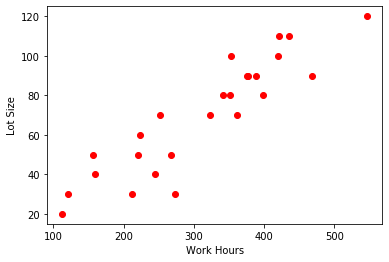

In [31]:
# Plot the data; let's see what it looks like
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data_toluca.iloc[:,1], data_toluca.iloc[:,0], color = 'red')
plt.ylabel("Lot Size")
plt.xlabel("Work Hours")
plt.show()

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Lot Size')]

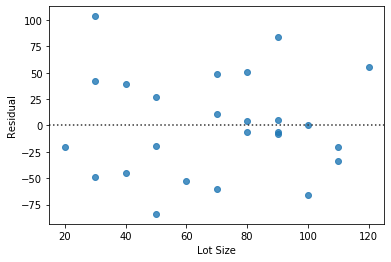

In [62]:
import seaborn as sns

r1 = sns.residplot('lotSize', 'workHours', data = data_toluca)
r1.set(xlabel = 'Lot Size', ylabel = 'Residual')
#dashed line is regression line (we just flat it)
#HERE is homoscedastic variance of errors(SLR 5) ----- 

In [63]:
data_toluca.isna().sum() #no Nans

lotSize      0
workHours    0
dtype: int64

In [64]:
corr_matrix = data_toluca.corr()
corr_matrix['lotSize'].sort_values(ascending=False) # control variacle is positive and high correlated with target

lotSize      1.000000
workHours    0.906385
Name: lotSize, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_toluca.drop('workHours', axis =1), data_toluca.iloc[:,1])
#lin_reg.fit(data_toluca.iloc[:,0], data_toluca.iloc[:,1]) - this does not work because iloc -> 
#give us pd.Series (1-dimensional array), and you can not give input to sklearn like that type 
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lin_reg.coef_

array([3.57020202])

In [68]:
lin_reg.intercept_

62.365858585858575

### Dataset 2
#### Credit

In [69]:
data_credit = pd.read_csv("credit.csv")

In [70]:
data_credit.info()
#Limit is target
#Income, Rating, Cards, Age, Education - predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [71]:
data_credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


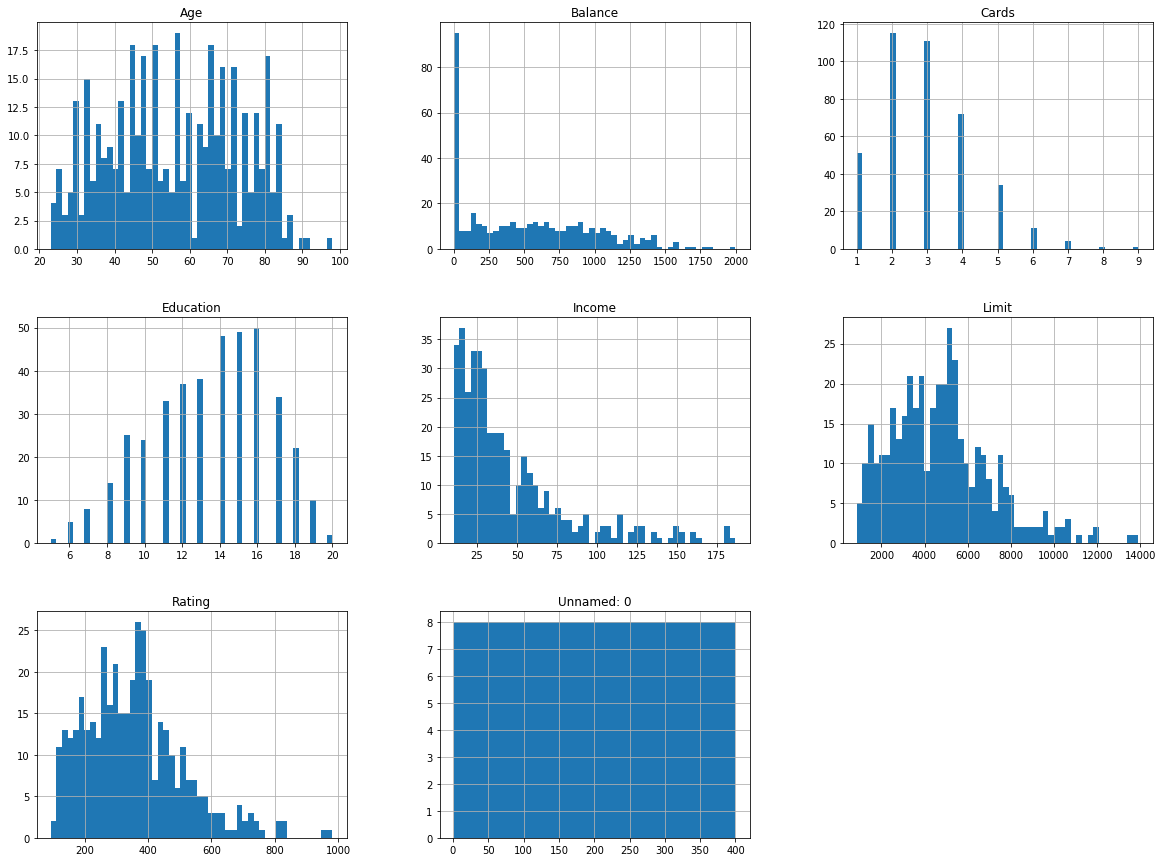

In [72]:
data_credit.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f8665f8>,
      dtype=object)

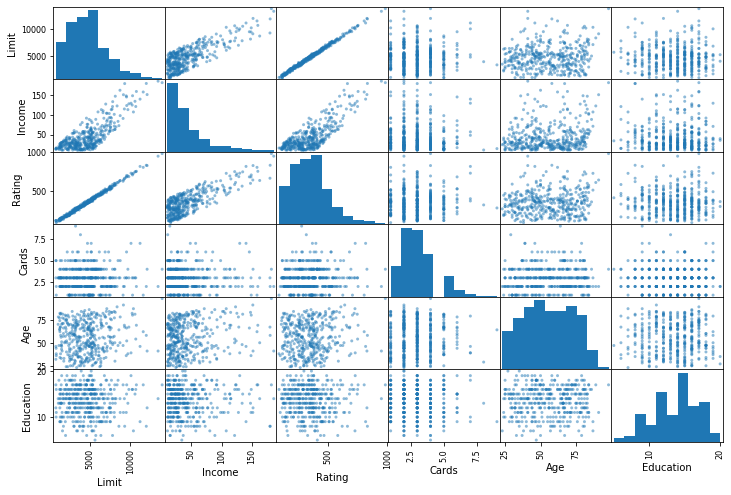

In [73]:
attributes = ['Limit', 'Income', 'Rating', 'Cards', 'Age', 'Education']
scatter_matrix(data_credit[attributes], figsize=(12, 8))

In [74]:
#Looks like Rating and Income predict limit
data_credit.isna().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [75]:
corr_matrix = data_credit.corr()
corr_matrix['Limit'].sort_values(ascending=False)

Limit         1.000000
Rating        0.996880
Balance       0.861697
Income        0.792088
Age           0.100888
Unnamed: 0    0.024172
Cards         0.010231
Education    -0.023549
Name: Limit, dtype: float64

#### Limit

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

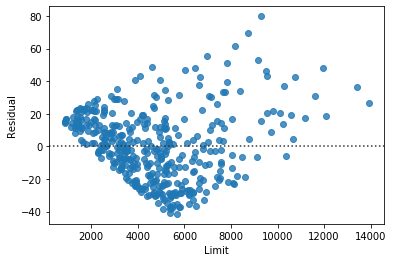

In [76]:
r1 = sns.residplot('Limit', 'Income', data = data_credit)
r1.set(xlabel = 'Limit', ylabel = 'Residual') # heteroscedasticity

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

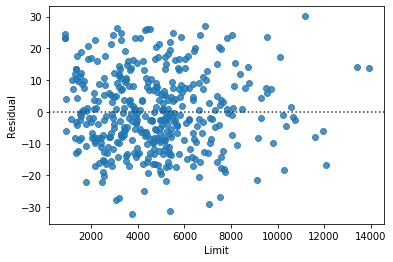

In [77]:
r2 = sns.residplot('Limit', 'Rating', data = data_credit)
r2.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

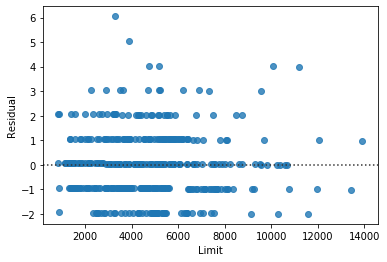

In [78]:
r3 = sns.residplot('Limit', 'Cards', data = data_credit)
r3.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

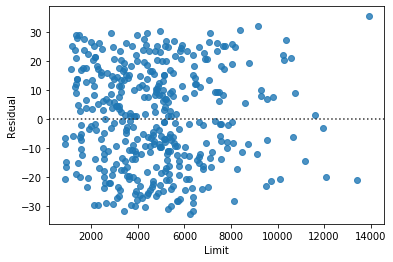

In [79]:
r4 = sns.residplot('Limit', 'Age', data = data_credit)
r4.set(xlabel = 'Limit', ylabel = 'Residual')

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Limit')]

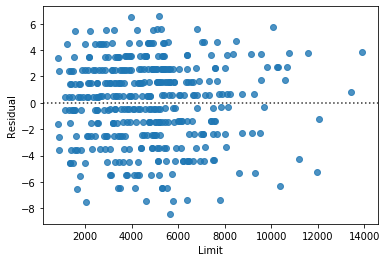

In [80]:
r5 = sns.residplot('Limit', 'Education', data = data_credit)
r5.set(xlabel = 'Limit', ylabel = 'Residual')

In [81]:
reg = LinearRegression()
reg.fit(data_credit[['Limit']], data_credit[['Income', 'Rating', 'Cards', 'Age', 'Education']])
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
reg.coef_ # for each features

array([[ 1.20945290e-02],
       [ 6.68232560e-02],
       [ 6.07831934e-06],
       [ 7.53963270e-04],
       [-3.18837514e-05]])

In [83]:
reg.intercept_ #after "End" --- 

array([-12.05596648,  38.49178871,   2.92871551,  52.09703154,
        13.60098869])

> **Note:**
> For Limit vs Income the variance of residuals looks heteroscedasctic -> the assumption that the variance of residuals is homoscedastic does not hold anymore. Other plots reveal that there may be homoscedasticity 

### Step-by-step.

In [84]:
reg1 = LinearRegression()
reg1.fit(data_credit[['Limit']], data_credit[['Income']])
reg1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
reg1.coef_

array([[0.01209453]])

In [86]:
reg1.intercept_

array([-12.05596648])

In [87]:
reg2 = LinearRegression()
reg2.fit(data_credit[['Limit']], data_credit[['Rating']])
print(reg2.coef_)
print(reg2.intercept_)

[[0.06682326]]
[38.49178871]


In [88]:
reg3 = LinearRegression()
reg3.fit(data_credit[['Limit']], data_credit[['Cards']])
print(reg3.coef_)
print(reg3.intercept_)

[[6.07831934e-06]]
[2.92871551]


In [89]:
reg4 = LinearRegression()
reg4.fit(data_credit[['Limit']], data_credit[['Age']])
print(reg4.coef_)
print(reg4.intercept_)

[[0.00075396]]
[52.09703154]


In [90]:
reg5 = LinearRegression()
reg5.fit(data_credit[['Limit']], data_credit[['Education']])
print(reg5.coef_)
print(reg5.intercept_)

[[-3.18837514e-05]]
[13.60098869]


## End.